In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_1 = pd.read_csv("../House price/source/train.csv")
df_2 = pd.read_csv("../House price/source/test.csv")

# Так нужно сделать, чтобы сразу обработать обе таблицы сразу, далее мы их разделяем
# Также можно создать функцию, которая бы обрабатывала наши таблицы, а потом прогнать через нее обе таблицы

if "SalePrice" not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1, df_2], axis=0)
df = df.set_index("Id")

In [14]:
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# ОБРАБОТКА ДАННЫХ

In [15]:
df.isna().sum().sort_values(ascending = False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
                 ... 
1stFlrSF            0
CentralAir          0
SaleCondition       0
Heating             0
MSSubClass          0
Length: 80, dtype: int64

In [16]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

<AxesSubplot:ylabel='Id'>

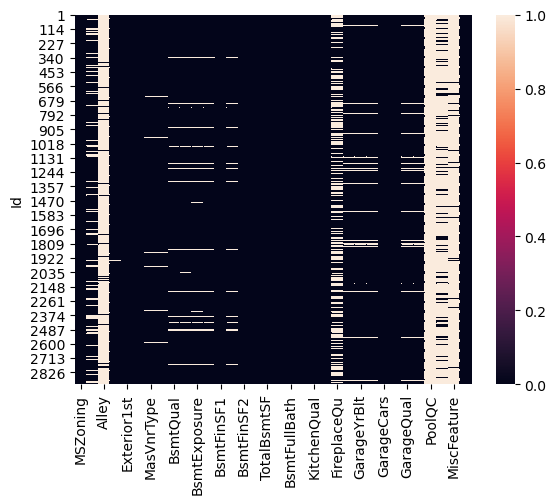

In [17]:
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index]
sns.heatmap(df_null.isnull())

In [18]:
df_objects = df[df.select_dtypes(include = ["object"]).columns]
# Получаем список столбцов с пропусками > 1100
columns_to_drop = df_objects.columns[df_objects.isna().sum() > 1100]
df_objects = df_objects.drop(columns=columns_to_drop)

In [19]:
df_objects.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [20]:
df_objects = df_objects.fillna("null")
df_objects_encoded = pd.get_dummies(df_objects)
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
5,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [21]:

for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
5,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
new_df = pd.concat([df, df_objects_encoded], axis=1)


len(df.columns), len(df_objects_encoded.columns)

(80, 234)

In [23]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)
new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [24]:

Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']
# вставляет самый часто повторяющеясе значение
for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])
    
# вставляет среднее значение
for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0] 

Series([], dtype: int64)

# НАЧАЛО ОБУЧЕНИЯ МОДЕЛИ

In [25]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]
testing_data = testing_data.drop(columns='SalePrice')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

from sklearn.linear_model import LinearRegression
#  Это модель XGBoost (eXtreme Gradient Boosting). 
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [27]:
X = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
Y_train = np.reshape(Y_train.values, (-1, 1))  # или Y_train.to_numpy()
Y_test = np.reshape(Y_test.values, (-1, 1))
X_train.shape, Y_train.shape

((1168, 270), (1168, 1))

### Модель 1

In [28]:
model_1 = LinearRegression()
model_1.fit(X, y)
y_pred = model_1.predict(X_test)
mean_squared_error(Y_test, y_pred)

300952084.53706086

### Модель 2

In [29]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
model_2.fit(X, y)
y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)

5959.18511727738

### Модель 3

In [30]:
model_3 = RandomForestRegressor(n_estimators=1000)
model_3.fit(X, y)
y_pred = model_3.predict(X_test)
mean_squared_error(Y_test, y_pred)

77702666.2559476

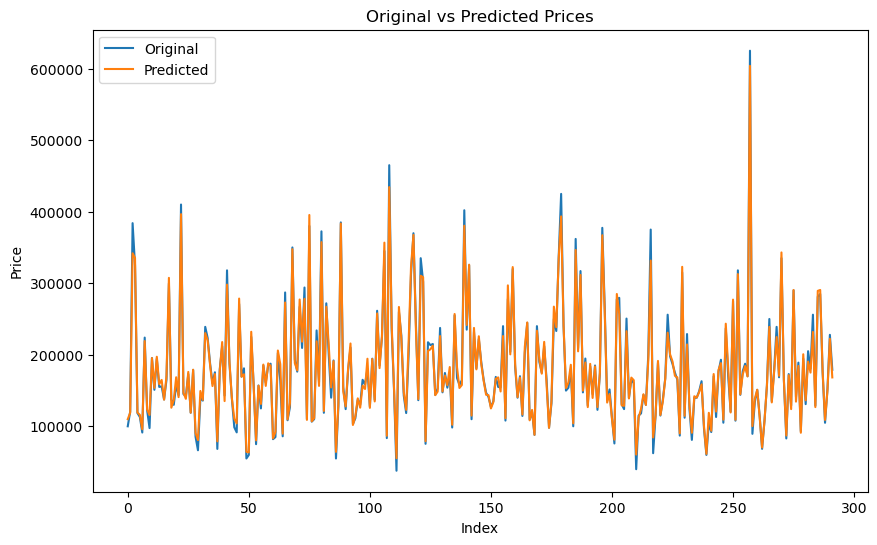

In [31]:
sort_indices = np.argsort(Y_test)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Original')
plt.plot(np.arange(len(Y_test)), y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.show()

In [32]:
pred = model_2.predict(testing_data)

final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = pred

# Write DataFrame to a CSV file without index
final.to_csv('output.csv', index=False)